### Crime Types According to Frequency on Chicago Crime Data 

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. 

For this problem, our goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. We will than plot these crimes on the map of Chicago.

In [2]:
import pandas as pd
import numpy as np

data_crime = pd.read_csv('chicago_crime_data.csv')   # give path to the csv files that are under the data folder
data_id = pd.read_csv('primary_type_id.csv')   # give path to the csv files that are under the data folder

data_crime_sort = data_crime.sort_values(['Primary Type ID'])
merge1 = pd.merge(data_id, data_crime_sort)

a = merge1.groupby('Primary Type ID')['Primary Type ID'].count()

high_freq = (a[a > 10000])
high_freq = list(high_freq.index)

dd = []
for i in range(len(high_freq)):
    df = merge1[merge1['Primary Type ID'] == high_freq[i]]
    dd.append(df)
merge2 = pd.concat(dd)  # Final Dataframe with high frequency value data



In [3]:
# Dates sorting
monthdate = pd.DataFrame()
m = []
for index, row in merge2.iterrows():
    d = row['Date'].split("/")
    m1 = [int(d[0])]
    m.append(m1)

In [4]:
se = pd.Series(m)
for index, row in se.iteritems():
    se[index] = se[index][0]

merge2['month'] = se.values

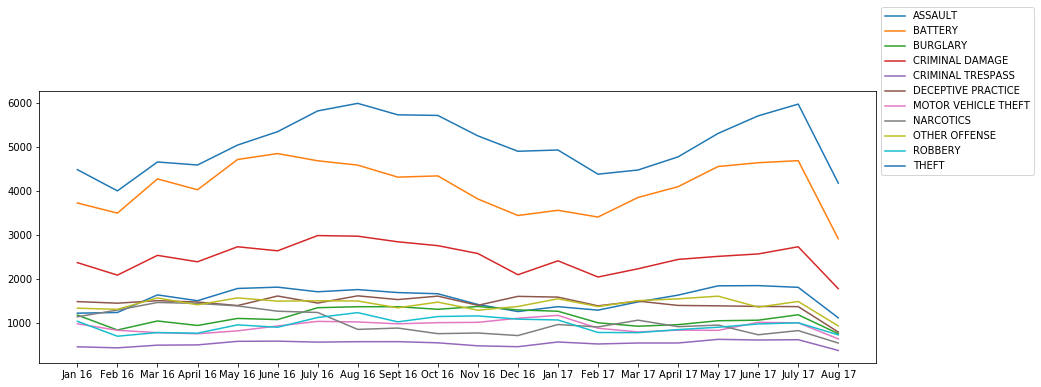

In [5]:
# Sorting by month

import matplotlib.pyplot as plt
final_sort = merge2.sort_values(['Year','month'])

monthwise = final_sort.groupby(['Primary Type ID','Year','month']).size()

df1 = pd.DataFrame({'Primary Type ID':monthwise.index , 'frequency':monthwise.values})

yearmonth = []
id = []
for index, row in df1.iterrows():
    x = row['Primary Type ID']
    x = list(x)
    if len(str(x[2])) == 1:
        x[2] = '0' + str(x[2])
    x1 = str(x[1]) + str(x[2])
    yearmonth.append(x1)
    id.append(x[0])

df1['ID'] = (pd.Series(id).values)
df1['YearMonth'] = pd.Series(yearmonth).values

plt.figure(figsize=(15,5))
for i in range(len(high_freq)):
    x = df1.YearMonth[df1.ID == high_freq[i]]
    y = df1.frequency[df1.ID == high_freq[i]]
    x1 = list(x)
    y1 = list(y)
    for j in range(len(x1)):
        x1[j] = j
    ans = merge2[merge2['Primary Type ID'] == high_freq[i]]['Primary Type'].values[0]
    plt.plot(x1,y1, label = ans)
    labels = ['Jan 16','Feb 16', 'Mar 16', 'April 16', 'May 16', 'June 16', 'July 16', 'Aug 16', 'Sept 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'April 17', 'May 17', 'June 17' ,'July 17', 'Aug 17']
    plt.xticks(x1, labels)
    plt.legend(loc = 'center left',bbox_to_anchor = (1,1))
    

plt.show()


In [6]:
# Forward and Backward Fill
merge2 = merge2.fillna(method='ffill')
merge2 = merge2.fillna(method='bfill')

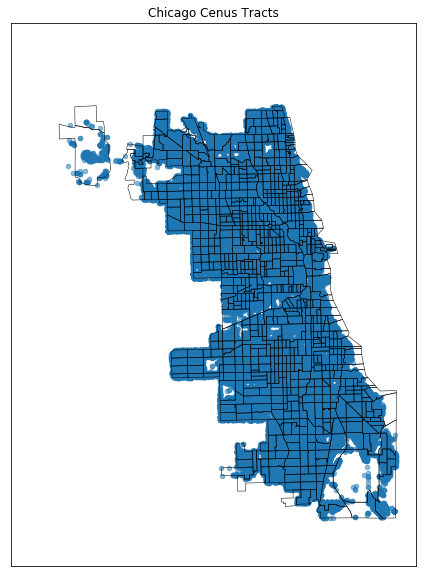

In [8]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
lons = merge2['Longitude'].tolist()
lats = merge2['Latitude'].tolist()
x,y = m(lons,lats)
plt.scatter(x,y,alpha=0.5,s=20)
plt.title("Chicago Cenus Tracts")
plt.show()